In [4]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
import copy

In [5]:
with open("SavedFeatures/final_feature_vector.json", 'r') as f:
    XY = json.load(f)

In [6]:
step = 50000000
lo = 0
clss = 0
num_classes = 7

while(lo < step*(num_classes-1) + 1):
    hi = lo + step
    lo_txt = lo
    hi_txt = hi
    if(lo_txt == 0):
        lo_txt = '---'
    if(lo_txt == step*(num_classes-1)):
        hi_txt = '+++'
    print('{} to {} :: {}'.format(lo_txt, hi_txt, clss))

    clss += 1
    lo += step

--- to 50000000 :: 0
50000000 to 100000000 :: 1
100000000 to 150000000 :: 2
150000000 to 200000000 :: 3
200000000 to 250000000 :: 4
250000000 to 300000000 :: 5
300000000 to +++ :: 6


In [7]:
len(XY)

8181

In [8]:
def getClass(revenue):
    clss = revenue//step
    return min(clss, num_classes-1)

In [9]:
xrr = []
yrr = []
frq_dst = {}
for i in range(num_classes):
    frq_dst[i] = 0

for xy in XY:
    xrr.append(xy['feature'])
    yrr.append(getClass(xy['target']))
    frq_dst[getClass(xy['target'])] += 1
frq_dst

{0: 5082, 1: 1063, 2: 527, 3: 351, 4: 248, 5: 177, 6: 733}

# Normalize

In [10]:
mxrr = [0]*len(xrr[1])
len(mxrr)

178

In [11]:
for feature in xrr:
    for i in range(len(feature)):
        mxrr[i] = max(mxrr[i], feature[i])

In [12]:
mnrr = copy.deepcopy(mxrr)

for feature in xrr:
    for i in range(len(feature)):
        mnrr[i] = min(mnrr[i], feature[i])

In [13]:
nxrr = [[0]*len(xrr[0])]*len(xrr)

for i in range(len(xrr)):
    for j in range(len(xrr[i])):
        if(mxrr[j]-mnrr[j] != 0):        
            nxrr[i][j]= (xrr[i][j] - mnrr[j]) / (mxrr[j] - mnrr[j])

In [14]:
xrr = np.array(xrr)
nxrr = np.array(nxrr)
yrr = np.array(yrr)

xrr.shape, nxrr.shape, yrr.shape

((8181, 178), (8181, 178), (8181,))

# Train-test split

In [15]:
NX_train, NX_test, ny_train, ny_test = train_test_split(nxrr, yrr, test_size=0.30, random_state=17) # normalized
X_train, X_test, y_train, y_test = train_test_split(xrr, yrr, test_size=0.30, random_state=17) # not normalized

# Visualization

In [20]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def visualizePCA2D(X , y , colors):

    colors = np.array(sns.color_palette("hls", len(set(y))))

    pca = TSNE(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
    # principalDf.head(5)

    #%%
    targetDf = pd.DataFrame(data = np.array(y) , columns = ['target'])
    # targetDf.head()

    #%%
    finalDf = pd.concat([principalDf, targetDf], axis = 1)
    print(finalDf.head(5))

    #%%
    # Visualize data
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)


    targets = list(set(y))

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
    ax.legend(targets)
    ax.grid()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   principal component 1  principal component 2  target
0              23.019758              38.234795       4
1               0.350246             -11.727126       0
2             -50.487820              23.451410       3
3              45.649307             -48.842480       0
4             -15.546886              17.579849       3


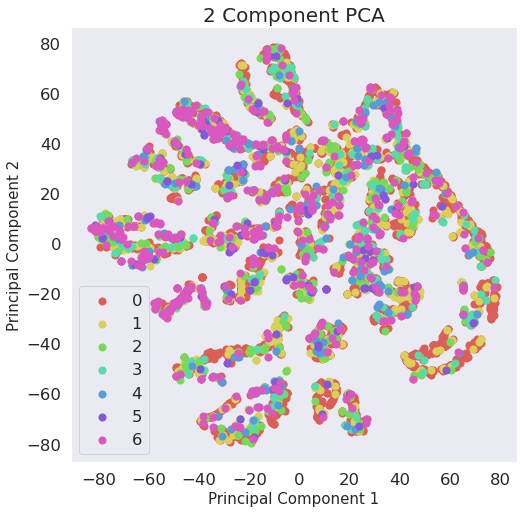

In [21]:
visualizePCA2D(X_train, y_train, colors = "bgrcmyk")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   principal component 1  principal component 2  target
0              12.843156              -5.961065       4
1              13.247890              -5.008980       0
2              12.382679              -5.043996       3
3              12.382679              -5.043996       0
4              12.382679              -5.043996       3


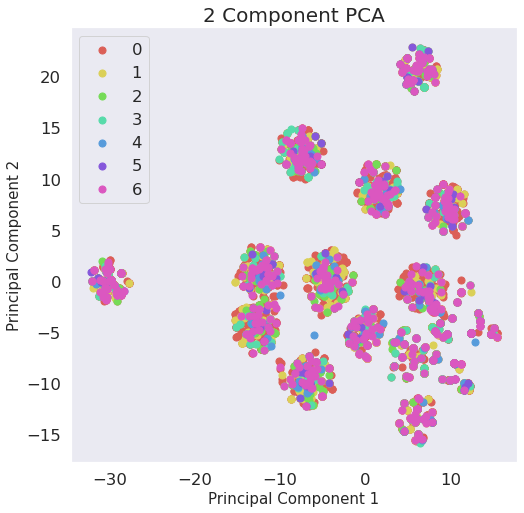

In [22]:
visualizePCA2D(NX_train, ny_train, colors = "bgrcmyk")

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
                rc={"lines.linewidth": 2.5})

from sklearn.manifold import TSNE

def visualizeTSNE2D(x, labels, subtitle=None):
    # We choose a color palette with seaborn.
    pca = TSNE(n_components=2)
    x = pca.fit_transform(x)

    le = LabelEncoder()
    labels = le.fit_transform(labels)
    
    num_classes = len(set(labels))
    
    print(x.shape , labels.shape , num_classes)
    
    encoded = list(set(labels))
    decoded = le.inverse_transform(encoded)
    
    for i in range(len(encoded)):
        print(encoded[i] , ":" , decoded[i])
    
    for i in range(5):
        print(x[i] , ':: ' , labels[i])
    
    palette = np.array(sns.color_palette("hls", len(set(labels))))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_classes):
        # Position of each label.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        print(xtext , type(xtext))
        txt = ax.text(xtext, ytext, decoded[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.show()

(5726, 2) (5726,) 7
0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
[-31.355011 -12.661891] ::  4
[-35.06143   25.916445] ::  0
[ 4.9901934 41.295578 ] ::  3
[76.641495 -9.336752] ::  0
[45.10826  28.241858] ::  3
1.1544979 <class 'numpy.float32'>
-4.1736646 <class 'numpy.float32'>
-7.4747376 <class 'numpy.float32'>
-3.4901342 <class 'numpy.float32'>
-3.0648835 <class 'numpy.float32'>
-2.2900372 <class 'numpy.float32'>
-0.6249841 <class 'numpy.float32'>


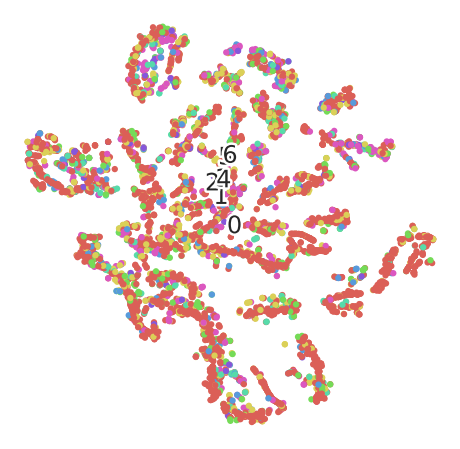

In [24]:
visualizeTSNE2D(X_train, y_train)

(5726, 2) (5726,) 7
0 : 0
1 : 1
2 : 2
3 : 3
4 : 4
5 : 5
6 : 6
[ 2.0095122 14.233041 ] ::  4
[ 0.59354156 14.277225  ] ::  0
[ 1.130759 13.70038 ] ::  3
[ 1.130759 13.70038 ] ::  0
[ 1.130759 13.70038 ] ::  3
-1.0198112 <class 'numpy.float32'>
-1.2039093 <class 'numpy.float32'>
-1.4337362 <class 'numpy.float32'>
-0.55438673 <class 'numpy.float32'>
-0.38508558 <class 'numpy.float32'>
-0.043088965 <class 'numpy.float32'>
0.78618747 <class 'numpy.float32'>


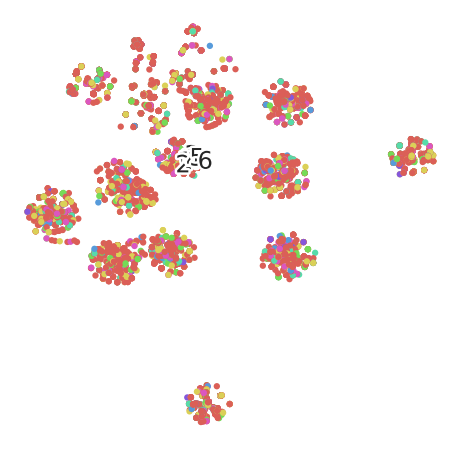

In [25]:
visualizeTSNE2D(NX_train, ny_train)